# DBSCAN Clustering Demonstration

This notebook demonstrates how to use the k-Means and DBSCAN algorithms to cluster data.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, pandas, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler

## Define Colors and Generate Sample Data

Define custom colors for visualizations and generate anisotropically distributed blob data.

In [2]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#179E86", # Dark Green
    "#9EBE5B", # Light Green
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#633248", # Brown
    "#44546A", # Gray
]

# Anisotropicly distributed data.
N_SAMPLES = 500
RANDOM_STATE = 170
X, _ = datasets.make_blobs(n_samples=N_SAMPLES, random_state=RANDOM_STATE)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

# Creating a DataFrame for the dataset.
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

## Apply K-Means Clustering

Apply K-Means clustering with 3 clusters to the anisotropic data.

In [3]:
# Applying K-means.
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)
df["KMeans_Cluster"] = kmeans.fit_predict(X)

## Visualize K-Means Results

Plot the K-Means clustering results showing cluster assignments.

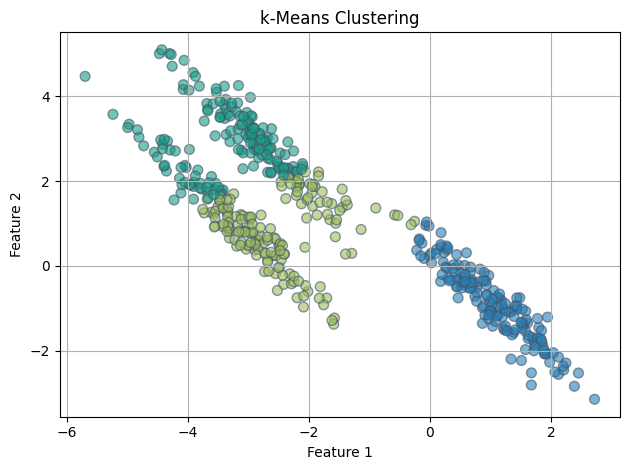

In [4]:
# Plotting the K-means clusters.
plt.scatter(
    df["Feature 1"], df["Feature 2"],
    c=[colors[color] for color in df["KMeans_Cluster"]],
    s=50, edgecolor=colors[-1], alpha=0.6
)
plt.title("k-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()

## Apply DBSCAN Clustering

Apply DBSCAN clustering after standardizing the features.

In [5]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.15)
df["Cluster"] = dbscan.fit_predict(X_scaled)

## Visualize DBSCAN Results

Plot the DBSCAN clustering results showing density-based cluster assignments.

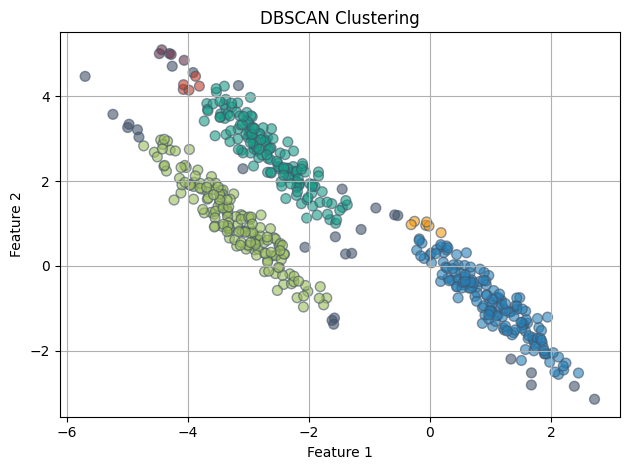

In [6]:
# Plotting the clusters.
plt.scatter(
    df["Feature 1"], df["Feature 2"],
    c=[colors[color] for color in df["Cluster"]],
    s=50, edgecolor=colors[-1], alpha=0.6
)

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()